<a href="https://colab.research.google.com/github/griffingillam/ie200/blob/master/IE200_Final_Exam_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Compare groups


The dataset "stereo-fusion.csv" contains results from an experiment in visual perception using random dot sterograms, such as that shown below. Both images appear to be composed entirely of random dots. However, they are constructed so that a 3D image (of a diamond) will be seen, if the images are viewed with a stereo viewer, causing the separate images to fuse. Another way to fuse the images is to fixate on a point between them and defocus they eyes, but this technique takes some effort and practice.


An experiment was performed to determine whether knowledge of the form of the embedded image affected the time required for subjects to fuse the images. One group of subjects (group NV) received either no information or just verbal information about the shape of the embedded object. A second group (group VV) received both verbal information and visual information (e.g., a drawing of the object).

<img src="https://github.com/utk-ie200/repo-Gillam-Griffin-Scott/blob/master/exam03/files/fusion0.gif?raw=1">

## Objective: 
    1. Explore the normality of the data using Shapiro test and probability plots.
    2. Check the significance of differences between the groups using an appropriate statisitcal test, and report your findings.

In [106]:
import pandas as pd 
df = pd.read_csv("fusion.sas.txt", sep="\s+")
df.head()

,time,group
0,47.20001,NV
1,21.99998,NV
2,20.39999,NV
3,19.70001,NV
4,17.40000,NV


In [0]:
from scipy.stats import shapiro, norm
from matplotlib import pyplot as pplot
import numpy as np

In [0]:
summ = df.groupby(by = 'time', as_index = False)['group'].sum()
summ

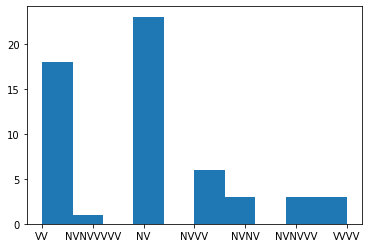

In [45]:
histgraph = pplot.hist(summ.group)

In [88]:
stat,pval = shapiro(summ.time)
stat,pval

(0.7426135540008545, 1.1888075412969101e-08)

In [0]:
# X = norm(loc = 10, scale = 2)
# sample = X.rvs(20)
# shapiro(sample)

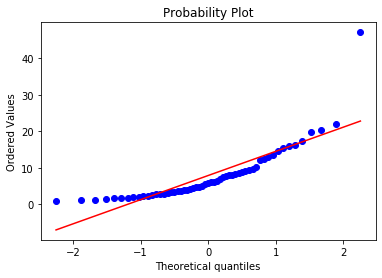

In [48]:
from scipy.stats import probplot
probgraph = probplot(summ.time, plot = pplot, dist = norm )

Ttest_indResult(statistic=2.038403760310477, pvalue=0.04528665998507748)

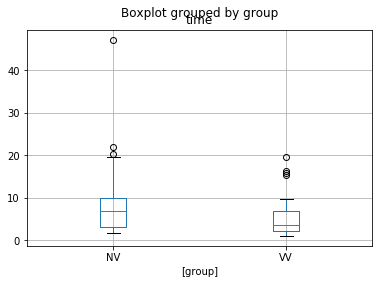

In [120]:
from scipy.stats import ttest_ind
import statistics
df.boxplot(column = 'time', by = ['group'], showfliers = True)
nv = df[df.group == 'NV'].time
vv = df[df.group == 'VV'].time
ttest_ind(nv, vv, equal_var = False)

In [119]:
meanvv = statistics.mean(vv)
meannv = statistics.mean(nv)
print("It took the NV group more time to fuse the images (mean =", meannv)
print("compared to the VV group (mean =", meanvv)

It took the NV group more time to fuse the images (mean = 8.56046465116279
compared to the VV group (mean = 5.551428857142857


# 2. Compare groups


The data contains the outcomes for two items in the Montana Economic Outlook Poll conducted in May 1992, with accompanying demographics for 209 out of 418 poll respondents. The items are whether the respondent feels his/her financial status is worse, the same, or better than a year ago, and whether the respondent views the state economic outlook as better over the next year. Respondents are classified by age, income , political orientation, and area of residence in the state. 

## Objective: 
Formulate a resonable research question and use an appropriate statistical test for the difference between proportions for the two samples.

Variable Names:

- AGE = 1 under 35, 2 35-54, 3 55 and over
- SEX = 0 male, 1 female
- INC = yearly income: 1 under $20K, 2 20-35$K, 3 over $35K
- POL = 1 Democrat, 2 Independent, 3 Republican
- AREA = 1 Western, 2 Northeastern, 3 Southeastern Montana
- FIN = Financial status 1 worse, 2 same, 3 better than a year ago
- STAT = State economic outlook 0 better, 1 not better than a year ago


Question: Does amount of income determine someones outlook on the economic state?

In [0]:
df = pd.read_csv("montana.csv",sep="\s+")
df.head()
dd=df[ df.FIN!="*"] # exclude missing data
dd.FIN.mean() # average in column FIN
dd.FIN.unique() # unique values in column FIN
import scipy.stats as stats

In [74]:
df

,AGE,SEX,INC,POL,AREA,FIN,STAT
0,3,0,2,2,1,2,1
1,2,0,3,3,1,3,1
2,1,0,2,*,1,2,1
3,3,1,2,1,1,1,0
4,3,1,3,3,3,2,*
...,...,...,...,...,...,...,...
204,1,0,3,3,2,*,1
205,1,1,2,3,3,3,1
206,3,1,1,3,2,2,0
207,3,0,3,3,3,1,1


In [203]:
s1 = df[(df.INC=='3') & (df.STAT == '0')]
print("Those who make over 35k a year and have a positive outlook on the economic state:")
s1

Those who make over 35k a year and have a positive outlook on the economic state:


,AGE,SEX,INC,POL,AREA,FIN,STAT
3,3,1,3,1,1,1,0
33,2,1,3,1,3,2,0
37,3,0,3,3,3,3,0
38,1,0,3,3,3,1,0
41,2,1,3,1,1,1,0
47,2,0,3,1,1,1,0
57,3,0,3,1,2,1,0
60,2,0,3,2,2,2,0
73,2,0,3,2,2,1,0
80,2,1,3,1,1,2,0


In [205]:
s1 = df[(df.INC == '3') & (df.STAT == '0')]
print("Number of people that make over 35k a year and have a postive outlook:",s1.shape)

Number of people that make over 35k a year and have a postive outlook: (34, 7)


In [206]:
s2 = df[(df.INC == '3') & (df.STAT == '1')]
s2

,AGE,SEX,INC,POL,AREA,FIN,STAT
0,3,0,3,2,1,2,1
9,1,0,3,1,1,2,1
25,1,0,3,3,1,1,1
30,2,0,3,3,1,2,1
53,3,1,3,1,1,2,1
56,1,0,3,2,1,1,1
66,1,1,3,1,1,3,1
116,2,0,3,1,3,1,1
117,3,0,3,3,1,3,1
119,1,1,3,3,2,3,1


In [207]:
print("Number of people that make over 35k a year and have a negative outlook:",s2.shape)

Number of people that make over 35k a year and have a negative outlook: (18, 7)


In [208]:
s3 = df[(df.INC == '1') & (df.STAT == '0')]
s3

,AGE,SEX,INC,POL,AREA,FIN,STAT
3,3,1,3,1,1,1,0
33,2,1,3,1,3,2,0
37,3,0,3,3,3,3,0
38,1,0,3,3,3,1,0
41,2,1,3,1,1,1,0
47,2,0,3,1,1,1,0
57,3,0,3,1,2,1,0
60,2,0,3,2,2,2,0
73,2,0,3,2,2,1,0
80,2,1,3,1,1,2,0


In [209]:
print("Number of people who make less than 35k a year and have a positive outlook on the economic state:", s3.shape)

Number of people who make less than 35k a year and have a positive outlook on the economic state: (34, 7)


In [210]:
s4 = df[(df.INC == '1') & (df.STAT == '1')]
s4

,AGE,SEX,INC,POL,AREA,FIN,STAT
6,3,1,1,3,3,1,1
15,3,0,1,1,3,1,1
19,2,0,1,3,3,3,1
23,3,0,1,2,1,2,1
42,1,0,1,3,1,2,1
55,2,1,1,1,1,3,1
71,3,1,1,1,1,3,1
88,2,0,1,1,3,2,1
107,1,0,1,1,2,1,1
125,1,1,1,3,3,3,1


In [211]:
print("Number of people who make less than 35k a year and have a negative outlook on the economic state:", s4.shape)

Number of people who make less than 35k a year and have a negative outlook on the economic state: (13, 7)


In [212]:
finaldata = pd.crosstab(df.STAT, df.INC)
print(finaldata)

INC    *   1   2   3
STAT                
*      2   8  10   8
0     12  26  46  34
1      5  13  27  18


In [216]:
from scipy.stats import fisher_exact
data = np.matrix([[26,34], [13,18]])
ratio, pval = fisher_exact(data, alternative = "two-sided")
print("p-value =", pval)

p-value = 1.0


In [0]:
# inccount = (df.INC == '3')
# inctot = sum(inccount)
# polcount = (df.POL == '3')
# poltot = sum(polcount)
# s1total = inctot + poltot
# s1total

In [0]:
#better = df[(df.INC == '3') & (df.POL == '3') & (df.STAT == '0')]

In [0]:
# s2 = df[(df.INC==3) & (df.POL==1)]
# pol2count = (df.POL == '1')
# pol2tot = sum(pol2count)
# s2total = inctot + pol2tot
# s2total

In [0]:
# income = list(df.INC)
# random.shuffle(income)
# df.loc[:,'INC'] = income
# df[['INC', 'STAT']].head(50)

In [0]:
# random.shuffle(income)
# df.loc[:,'']

# 3. Compare Groups

The data files contain play-by-play information about UT games in 2017 and 2018. 
Compare the two years with respect to the average gain on a pass play, and the average gain on a run play. Display the corresponding bar plots, check the data for normality, and run the comparisons using a) t-test and b) permutation test. Report your findings.

In [0]:
data2017 = pd.read_csv("gamedata2017.csv")
data2018 = pd.read_csv("gamedata2018.csv")

### COLUMN NAMES

First, let us check the columns in the dataset.

In [92]:
data2017.columns

Index(['gamedesc', 'teama', 'teamascore', 'teamb', 'teambscore', 'scorediff',
       'down', 'yardstomove', 'fieldside', 'fieldpos', 'distancetogoal',
       'playdesc', 'curteam', 'playtype', 'gain'],
      dtype='object')

In [0]:
for index, row in data2018.iterrows():
    print(row.curteam, " ### ", row.playdesc)

In [0]:
import random
pass2017 = np.array(data2017[data2017.playdesc.str.contains("pass")].gain)
run2017 = np.array(data2017[data2017.playdesc.str.contains("run")].gain)
pass2018 = np.array(data2018[data2018.playdesc.str.contains("pass")].gain)
run2018 = np.array(data2018[data2018.playdesc.str.contains("run")].gain)

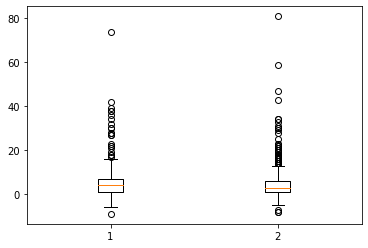

In [142]:
rungraph = pplot.boxplot(np.array([run2017, run2018]))

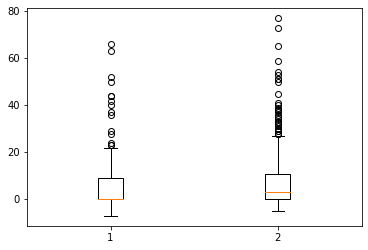

In [143]:
passgraph = pplot.boxplot(np.array([pass2017, pass2018]))

In [0]:
run17mean = statistics.mean(run2017)
run18mean = statistics.mean(run2018)
pass17mean = statistics.mean(pass2017)
pass18mean = statistics.mean(pass2018)

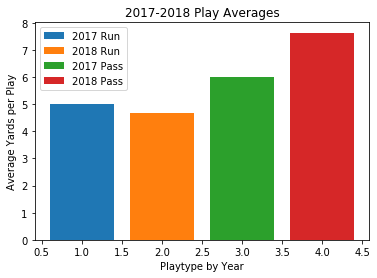

In [141]:
pplot.bar([1], [run17mean], label = '2017 Run')
pplot.bar([2], [run18mean], label = '2018 Run')
pplot.bar([3], [pass17mean], label = '2017 Pass')
pplot.bar([4], [pass18mean], label = '2018 Pass')

pplot.title('2017-2018 Play Averages')
pplot.xlabel('Playtype by Year')
pplot.ylabel('Average Yards per Play')
pplot.legend()
pplot.show()

In [0]:
totrunavg = run17mean - run18mean
runs = np.append(run2017, run2018)
runarray = np.array([])
trials = 9999
count = 0

for n in range(trials):
  random.shuffle(runs)
  runA = runs[0:379]
  runB = runs[379:]
  meanrunA = np.mean(runA)
  meanrunB = np.mean(runB)
  if meanrunA - meanrunB >= totrunavg: count = count + 1
  runarray = np.append(runarray, meanrunA - meanrunB)

In [166]:
print("p-value run =", (count + 1) / (trials + 1) *2)
runs.shape

p-value run = 0.5096


(1005,)

In [0]:
totpassavg = pass17mean - pass18mean
passes = np.append(pass2017, pass2018)
passarray = np.array([])
trials = 9999
count = 0

for n in range(trials):
  random.shuffle(passes)
  passA = passes[0:379]
  passB = passes[379:]
  meanpassA = np.mean(passA)
  meanpassB = np.mean(passB)
  if meanpassA - meanpassB >= totpassavg: count = count + 1
  passarray = np.append(passarray, meanpassA - meanpassB)

In [168]:
print("p-value pass =", (count + 1) / (trials + 1) *2)
passes.shape

p-value pass = 1.9482


(735,)

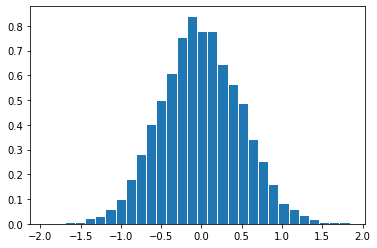

In [169]:
runplot = pplot.hist(runarray, bins = 30, rwidth = 0.9, density = True)

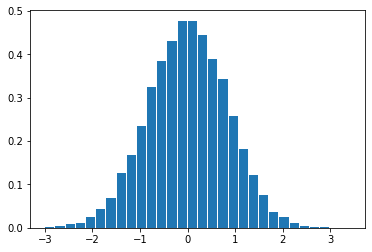

In [170]:
passplot = pplot.hist(passarray, bins = 30, rwidth = 0.9, density = True)

In [171]:
# pass difference
np.percentile(passarray, [2.5, 97.5])

array([-1.64396253,  1.60820165])

In [174]:
# run difference
np.percentile(runarray, [2.5, 97.5])

array([-0.94051101,  0.95720199])

In [122]:
runtest = ttest_ind(run2017, run2018, equal_var = False)
runtest

Ttest_indResult(statistic=1.45719777286634, pvalue=0.14547847170936937)

In [126]:
passtest = ttest_ind(pass2017, pass2018, equal_var = False)
passtest

Ttest_indResult(statistic=-1.8521792991006487, pvalue=0.06448389939577347)

Findings: The data is normal, run play average went down slightly from 2017-2018 while pass play average went us by alot from 2017-2018.


In [0]:
# statr17, pvalr17 = shapiro(run2017)
# statr18, pvalr18 = shapiro(run2018)
# statr17, pvalr17, statr18, pvalr18

In [0]:
# statp17, pvalp17 = shapiro(pass2017)
# statp18, pvalp18 = shapiro(pass2018)
# statp17, pvalp17, statp18, pvalp18

# 4. Counting

Antonin Dvorak is a Czech composer of 9 symphonies. Pyotr Tchaikovsky is a Russian composer of 7 symphonies.

- a. If a radio station announcer wants to play all 16 symphonies once, in how many ways can this be done.
- b. If a radio station announcer only wants to play exactly two symphonies – first a Dvorak symphony and then a Tchaikovsky symphony – in how many ways can this be done?
- c. If a radio station announcer randomly selects 3 symphonies out of 16 (equally probably), what is the probability that exactly 2 of the selected symphonies belong to Dvorak?
- d. If a radio station announcer randomly selects 3 symphonies out of 16 (equally probably), what is the probability that all three of the selected symphonies have the same author?

In [0]:
from scipy.special import factorial, comb

In [0]:
# A
factorial(16)

array(2.09227899e+13)

In [0]:
# B
comb(9,1)*comb(7,1)

63.0

In [0]:
# C
dvor = comb(9,2)
pyot = comb(7,1)
numerator = dvor*pyot
total = comb(16,3)
ans = numerator/total
ans

0.45

In [0]:
# D
dvorak = comb(9,3) / comb(16,3)
pyotr = comb(7,3) / comb(16,3)
answer = dvorak + pyotr
answer

0.2125